In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
ss = pd.read_csv('Downloads/Super_Store.csv', parse_dates=True)


In [3]:
##'''UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9a in position 6: 
   ### invalid start byte - so used encoding='latin1''''
    ###  encoding='latin1'

In [4]:
ss.shape #2121, 21



(2121, 21)

In [5]:
ss.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
ss.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [7]:
ss.isnull().sum() #No missing values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
#Order Date
#Adjusting the variable name
ss = ss.rename(columns={"Order Date":"Order_Date"})
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order_Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [9]:
#Changing the datatype being its a date
ss['Order_Date'] = pd.to_datetime(ss['Order_Date'])
ss['Order_year'] = pd.DatetimeIndex(ss['Order_Date']).year
ss['Order_month'] = pd.DatetimeIndex(ss['Order_Date']).month

In [10]:
ss.info()
ss.shape #2121, 23
ss.Order_Date.head()
ss.Order_Date.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order_Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   object        
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

<ipython-input-10-25fbccb69144>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ss.Order_Date.describe()


count                    2121
unique                    889
top       2016-09-05 00:00:00
freq                       10
first     2014-01-06 00:00:00
last      2017-12-30 00:00:00
Name: Order_Date, dtype: object

In [11]:
#Indexing data with Order_Date
ss = ss.set_index('Order_Date')
ss.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_year,Order_month
Order_Date,,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
2016-11-08,2,CA-2016-152156,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,6
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,2014,6


In [12]:
#Variable 1 - Row ID
ss['Row ID'].describe()

count    2121.000000
mean     5041.643564
std      2885.740258
min         1.000000
25%      2568.000000
50%      5145.000000
75%      7534.000000
max      9991.000000
Name: Row ID, dtype: float64

In [13]:
#Variable 2 - Order ID
#Adjusting the variable name
ss = ss.rename(columns={"Order ID":"Order_ID"})
ss.Order_ID.describe()

count               2121
unique              1764
top       US-2015-138121
freq                   4
Name: Order_ID, dtype: object

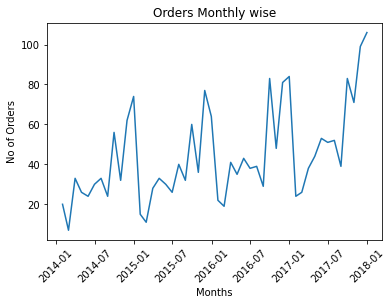

In [14]:
#Plot of Order Monthly wise
#Resample helps to filter data sec, min, hour, day, week, month, year wise 
#Resample works only when index is date format..
plt.plot(ss.Order_ID.resample('M').count())
plt.xticks(rotation=45)
plt.title('Orders Monthly wise')
plt.xlabel('Months')
plt.ylabel('No of Orders')
plt.show()


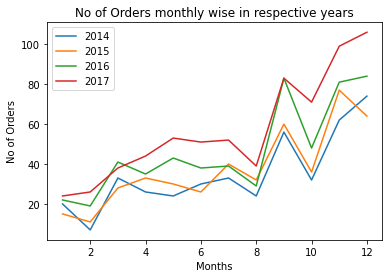

In [15]:

#Plot No of Orders monthly wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Order_month')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2015].groupby('Order_month')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2016].groupby('Order_month')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2017].groupby('Order_month')['Order_ID'].count())
plt.xlabel('Months')
plt.ylabel('No of Orders')
plt.title('No of Orders monthly wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

In [16]:
#Variable 3 - Ship Date
#Adjusting the variable name
ss = ss.rename(columns={"Ship Date":"Ship_Date"})

In [17]:
#Changing the datatype being its a date
ss['Ship_Date'] = pd.to_datetime(ss['Ship_Date'])
ss.info()
ss.Ship_Date.head()
ss.Ship_Date.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order_ID       2121 non-null   object        
 2   Ship_Date      2121 non-null   datetime64[ns]
 3   Ship Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Pro

<ipython-input-17-f9729f4c9fd9>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ss.Ship_Date.describe()


count                    2121
unique                    960
top       2015-12-16 00:00:00
freq                       10
first     2014-01-10 00:00:00
last      2018-01-05 00:00:00
Name: Ship_Date, dtype: object

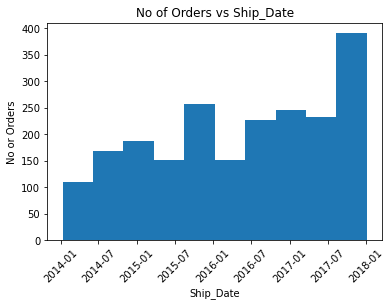

In [18]:
#Histogram
plt.hist(ss.Ship_Date)
plt.xticks(rotation=45)
plt.xlabel('Ship_Date')
plt.ylabel('No or Orders')
plt.title('No of Orders vs Ship_Date')
plt.show()

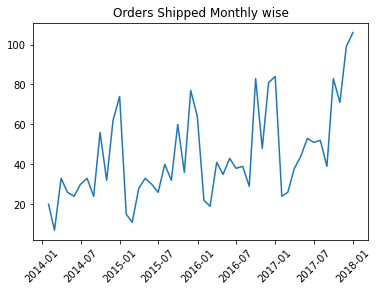

In [19]:
#Plot of Order Shipped Monthly wise
plt.plot(ss.Ship_Date.resample('M').count())
plt.xticks(rotation=45)
plt.title('Orders Shipped Monthly wise')
plt.show() #Similar plot as order Id

In [20]:
# Variable 4 - Ship Mode
#Adjusting the variable name
ss = ss.rename(columns={"Ship Mode":"Ship_Mode"})
ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order_ID       2121 non-null   object        
 2   Ship_Date      2121 non-null   datetime64[ns]
 3   Ship_Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Pro

In [21]:
ss.Ship_Mode.describe()

count               2121
unique                 4
top       Standard Class
freq                1248
Name: Ship_Mode, dtype: object

In [22]:
ss.Ship_Mode.value_counts()

Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: Ship_Mode, dtype: int64

In [23]:
ss.Ship_Mode.value_counts().sum() #2121


2121

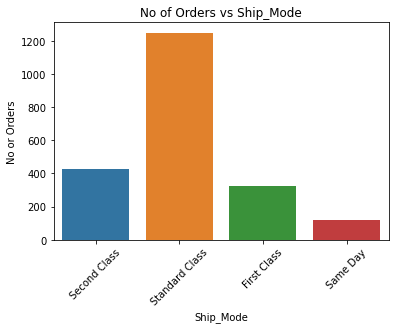

In [24]:
#Barplot
sns.countplot(x='Ship_Mode', data=ss)
plt.xticks(rotation=45)
plt.xlabel('Ship_Mode')
plt.ylabel('No or Orders')
plt.title('No of Orders vs Ship_Mode')
plt.show()

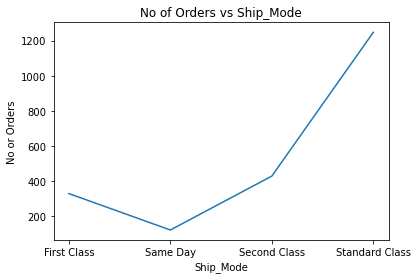

In [25]:
#line plot
plt.plot(ss.groupby('Ship_Mode')['Order_ID'].count())
plt.xlabel('Ship_Mode')
plt.ylabel('No or Orders')
plt.title('No of Orders vs Ship_Mode')
plt.show()

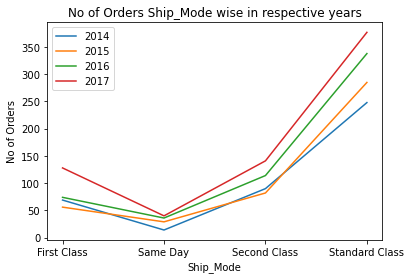

In [26]:
#Plot No of Orders Ship_Mode wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Ship_Mode')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2015].groupby('Ship_Mode')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2016].groupby('Ship_Mode')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2017].groupby('Ship_Mode')['Order_ID'].count())
plt.xlabel('Ship_Mode')
plt.ylabel('No of Orders')
plt.title('No of Orders Ship_Mode wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

In [27]:
#Variable 5 - Customer ID
#Adjusting the variable name
ss = ss.rename(columns={"Customer ID":"Customer_ID"})
ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order_ID       2121 non-null   object        
 2   Ship_Date      2121 non-null   datetime64[ns]
 3   Ship_Mode      2121 non-null   object        
 4   Customer_ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Pro

In [28]:
ss.Customer_ID.describe()

count         2121
unique         707
top       SV-20365
freq            15
Name: Customer_ID, dtype: object

In [29]:
ss.Customer_ID.value_counts() #707 different values 

SV-20365    15
JE-15745     9
KL-16555     9
CJ-12010     9
LC-16885     9
            ..
PT-19090     1
CM-12385     1
JF-15190     1
CY-12745     1
DP-13390     1
Name: Customer_ID, Length: 707, dtype: int64

In [30]:
ss.Customer_ID.value_counts().sum() #2121


2121

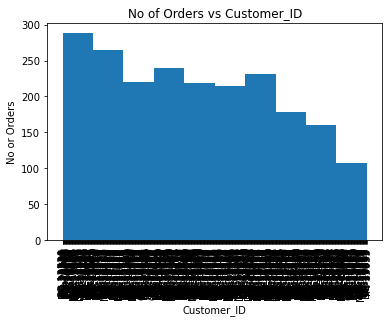

In [31]:
#Histogram
plt.hist(ss.Customer_ID)
plt.xticks(rotation=90)
plt.xlabel('Customer_ID')
plt.ylabel('No or Orders')
plt.title('No of Orders vs Customer_ID')
plt.show()

In [32]:
#Variable 6 - Customer Name
#Adjusting the variable name
ss = ss.rename(columns={"Customer Name":"Customer_Name"})
ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order_ID       2121 non-null   object        
 2   Ship_Date      2121 non-null   datetime64[ns]
 3   Ship_Mode      2121 non-null   object        
 4   Customer_ID    2121 non-null   object        
 5   Customer_Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Pro

In [33]:
ss.Customer_Name.describe()

count            2121
unique            707
top       Seth Vernon
freq               15
Name: Customer_Name, dtype: object

In [34]:
ss.Customer_Name.value_counts() #707 different values 


Seth Vernon          15
Caroline Jumper       9
Lena Creighton        9
Joel Eaton            9
Kelly Lampkin         9
                     ..
Hunter Glantz         1
Kristina Nunn         1
Andy Gerbode          1
David Flashing        1
Anthony O'Donnell     1
Name: Customer_Name, Length: 707, dtype: int64

In [35]:
ss.Customer_Name.value_counts().sum() #2121

2121

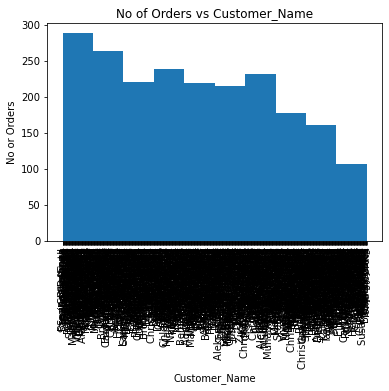

In [36]:
#Histogram
plt.hist(ss.Customer_Name)
plt.xticks(rotation=90)
plt.xlabel('Customer_Name')
plt.ylabel('No or Orders')
plt.title('No of Orders vs Customer_Name')
plt.show()


In [37]:
#Customer Id and Customer Name gives the same details

#Variable 7 - Segment
ss.Segment.describe()

count         2121
unique           3
top       Consumer
freq          1113
Name: Segment, dtype: object

In [38]:
ss.Segment.value_counts()

Consumer       1113
Corporate       646
Home Office     362
Name: Segment, dtype: int64

In [39]:
ss.Segment.value_counts().sum() #2121


2121

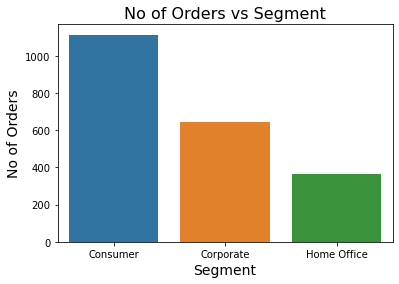

In [40]:
#Barplot
sns.countplot(x = 'Segment', data=ss)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Segment', fontsize=16)
plt.show()

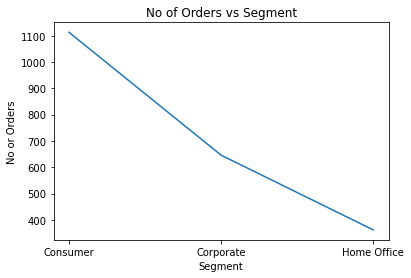

In [41]:
#line plot
plt.plot(ss.groupby('Segment')['Order_ID'].count())
plt.xlabel('Segment')
plt.ylabel('No or Orders')
plt.title('No of Orders vs Segment')
plt.show()

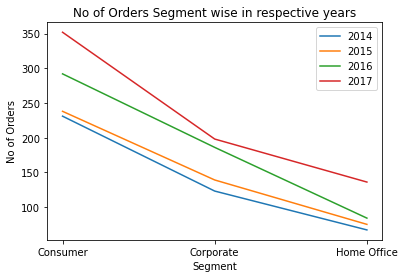

In [42]:
#Plot No of Orders Segment wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Segment')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2015].groupby('Segment')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2016].groupby('Segment')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2017].groupby('Segment')['Order_ID'].count())
plt.xlabel('Segment')
plt.ylabel('No of Orders')
plt.title('No of Orders Segment wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

In [43]:
#Variable 8 - Country
ss.Country.describe()

count              2121
unique                1
top       United States
freq               2121
Name: Country, dtype: object

In [44]:
#All the data belongs to one country United States

#Variable 9 - City
ss.City.describe()

count              2121
unique              371
top       New York City
freq                192
Name: City, dtype: object

In [45]:
ss.City.value_counts() #371 different cities

New York City      192
Los Angeles        154
Philadelphia       111
San Francisco      102
Seattle             97
                  ... 
Indianapolis         1
Rapid City           1
Danbury              1
Newport News         1
College Station      1
Name: City, Length: 371, dtype: int64

In [46]:
ss.City.value_counts().sum() #2121


2121

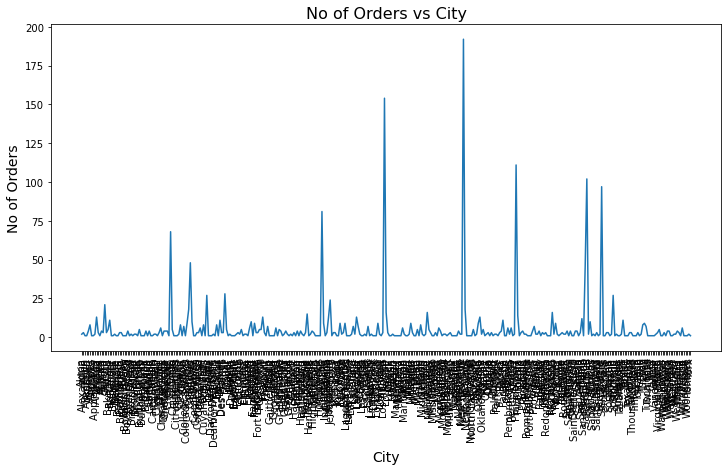

In [47]:
#Lineplot
fig = plt.gcf() 
fig.set_size_inches(12,6)
plt.plot(ss.groupby('City')['Order_ID'].count())
plt.xlabel('City', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs City', fontsize=16)
plt.xticks(rotation=90)
plt.show()


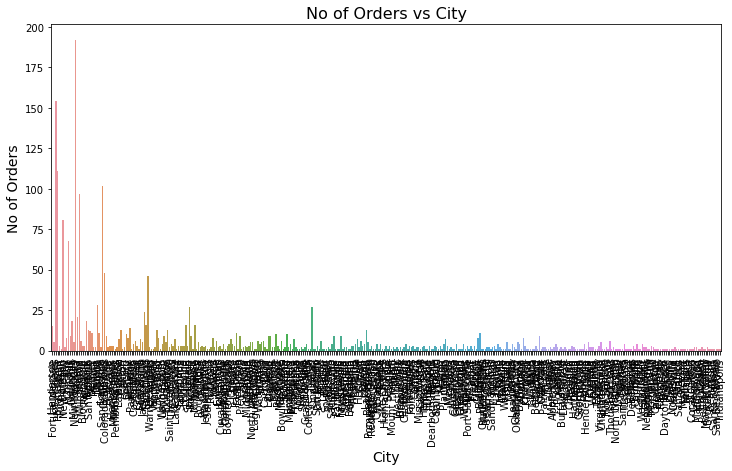

In [48]:
#Countplot/ Barplot
fig = plt.gcf() 
fig.set_size_inches(12,6)
sns.countplot(x='City', data=ss)
plt.xlabel('City', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs City', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [49]:
#Variable 10 - State
ss.State.describe()

count           2121
unique            48
top       California
freq             444
Name: State, dtype: object

In [50]:
ss.State.value_counts() #48 different States

ss.State.value_counts().sum() #2121

2121

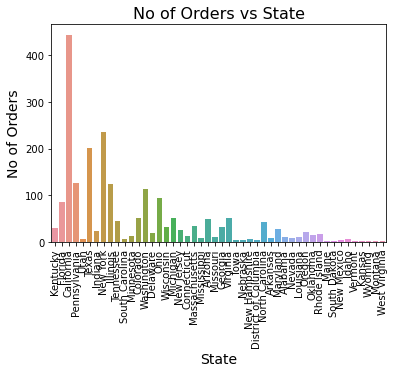

In [51]:
#Barplot
sns.countplot(x='State', data=ss)
plt.xlabel('State', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs State', fontsize=16)
plt.xticks(rotation=90)
plt.show()

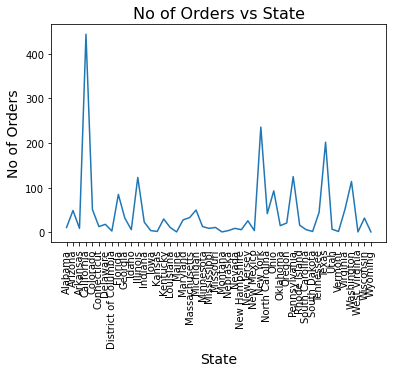

In [52]:
#Lineplot
plt.plot(ss.groupby('State')['Order_ID'].count())
plt.xlabel('State', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs State', fontsize=16)
plt.xticks(rotation=90)
plt.show()

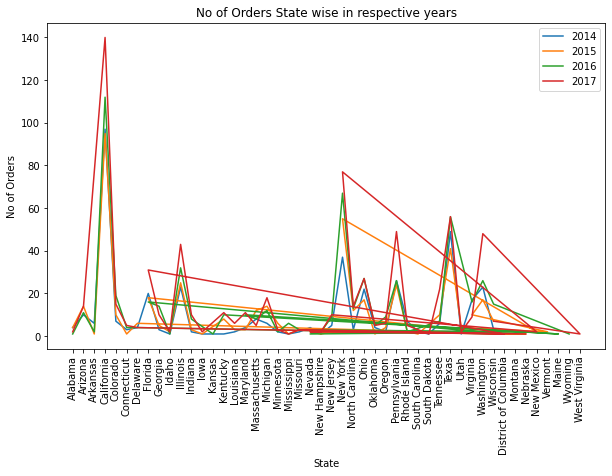

In [53]:
#Plot No of Orders State wise in respective years
fig = plt.gcf() 
fig.set_size_inches(10,6)
plt.plot(ss[ss.Order_year==2014].groupby('State')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2015].groupby('State')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2016].groupby('State')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2017].groupby('State')['Order_ID'].count())
plt.xlabel('State')
plt.ylabel('No of Orders')
plt.title('No of Orders State wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.xticks(rotation=90)
plt.show()

In [54]:
#Variable 11 - Postal Code 
#Adjusting the variable name
ss = ss.rename(columns={"Postal Code":"Postal_Code"})
ss.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order_ID       2121 non-null   object        
 2   Ship_Date      2121 non-null   datetime64[ns]
 3   Ship_Mode      2121 non-null   object        
 4   Customer_ID    2121 non-null   object        
 5   Customer_Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal_Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Pro

In [55]:
ss.Postal_Code.describe()

count     2121.000000
mean     55726.556341
std      32261.888225
min       1040.000000
25%      22801.000000
50%      60505.000000
75%      90032.000000
max      99301.000000
Name: Postal_Code, dtype: float64

In [56]:
ss.Postal_Code.value_counts() #454 different Postal codes


10035    59
10024    47
10011    44
10009    42
94122    41
         ..
95610     1
30062     1
75080     1
35630     1
45040     1
Name: Postal_Code, Length: 454, dtype: int64

In [57]:
ss.Postal_Code.value_counts().sum() #2121

2121

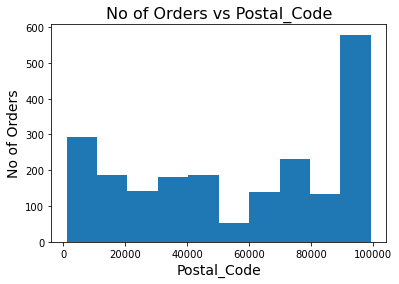

In [58]:
#Histogram - Though postal codes are not continuous, we have just made histogram
#for seeing how it looks like
plt.hist(ss.Postal_Code)
plt.xlabel('Postal_Code', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Postal_Code', fontsize=16)
plt.show()

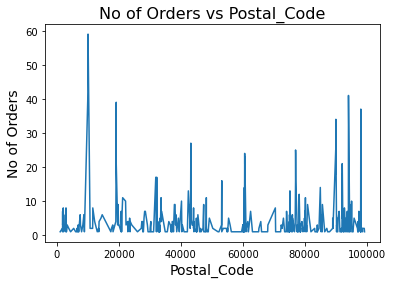

In [59]:
#Lineplot
plt.plot(ss.groupby('Postal_Code')['Order_ID'].count())
plt.xlabel('Postal_Code', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Postal_Code', fontsize=16)
plt.show()

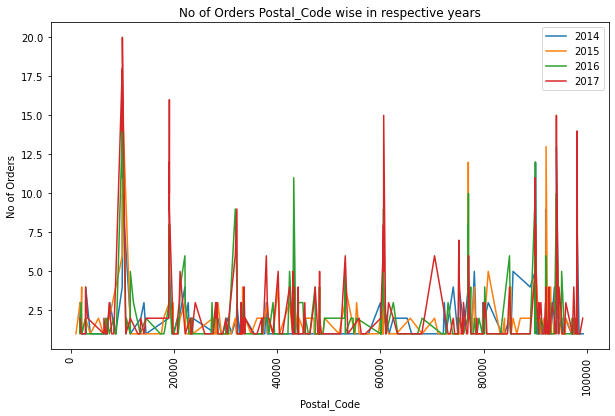

In [60]:
#Plot No of Orders Postal_Code wise in respective years
fig = plt.gcf() 
fig.set_size_inches(10,6)
plt.plot(ss[ss.Order_year==2014].groupby('Postal_Code')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2015].groupby('Postal_Code')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2016].groupby('Postal_Code')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2017].groupby('Postal_Code')['Order_ID'].count())
plt.xlabel('Postal_Code')
plt.ylabel('No of Orders')
plt.title('No of Orders Postal_Code wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.xticks(rotation=90)
plt.show()

In [61]:
#Variable 12 - Region
ss.Region.describe()

count     2121
unique       4
top       West
freq       707
Name: Region, dtype: object

In [62]:
ss.Region.value_counts() 

West       707
East       601
Central    481
South      332
Name: Region, dtype: int64

In [63]:
ss.Region.value_counts().sum() #2121

2121

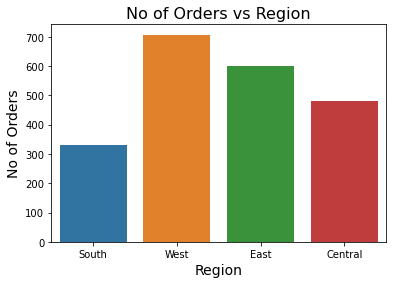

In [64]:
#Barplot
sns.countplot(x='Region', data=ss)
plt.xlabel('Region', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Region', fontsize=16)
plt.show()

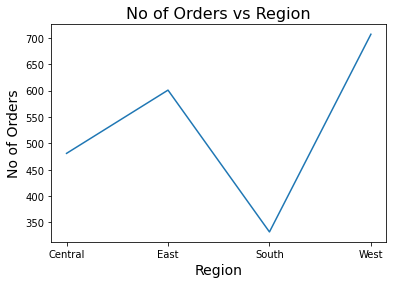

In [65]:
#Lineplot
plt.plot(ss.groupby('Region')['Order_ID'].count())
plt.xlabel('Region', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Region', fontsize=16)
plt.show()

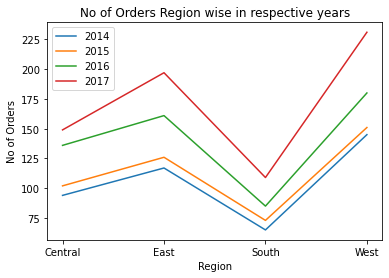

In [66]:
#Plot No of Orders Region wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Region')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2015].groupby('Region')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2016].groupby('Region')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2017].groupby('Region')['Order_ID'].count())
plt.xlabel('Region')
plt.ylabel('No of Orders')
plt.title('No of Orders Region wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

In [67]:
#Variable 13 - Product ID
#Adjusting the variable name
ss = ss.rename(columns={"Product ID":"Product_ID"})
ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order_ID       2121 non-null   object        
 2   Ship_Date      2121 non-null   datetime64[ns]
 3   Ship_Mode      2121 non-null   object        
 4   Customer_ID    2121 non-null   object        
 5   Customer_Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal_Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product_ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Pro

In [68]:
ss.Product_ID.describe()

count                2121
unique                375
top       FUR-FU-10004270
freq                   16
Name: Product_ID, dtype: object

In [69]:
ss.Product_ID.value_counts() #375 different States


FUR-FU-10004270    16
FUR-CH-10001146    15
FUR-CH-10002647    15
FUR-FU-10001473    14
FUR-CH-10003774    14
                   ..
FUR-TA-10001691     1
FUR-BO-10001567     1
FUR-CH-10002317     1
FUR-FU-10002874     1
FUR-BO-10002206     1
Name: Product_ID, Length: 375, dtype: int64

In [70]:
ss.Product_ID.value_counts().sum() #2121


2121

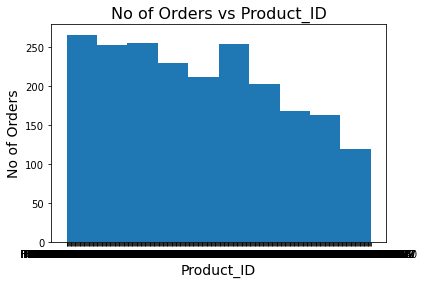

In [71]:
#Histogram
plt.hist(ss.Product_ID)
plt.xlabel('Product_ID', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Product_ID', fontsize=16)
plt.show()

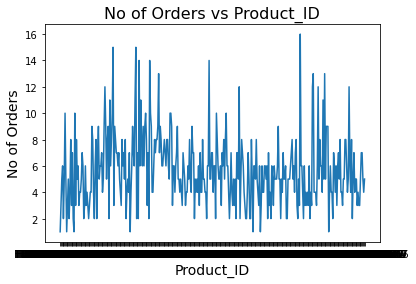

In [72]:
#Lineplot
plt.plot(ss.groupby('Product_ID')['Order_ID'].count())
plt.xlabel('Product_ID', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Product_ID', fontsize=16)
plt.show()

In [73]:
#Variable 14 - Category
ss.Category.describe()

count          2121
unique            1
top       Furniture
freq           2121
Name: Category, dtype: object

In [74]:
#The data is having only one category no much information from this variable 


In [75]:
#Variable 15 - Sub-Category
#Adjusting the variable name
ss = ss.rename(columns={"Sub-Category":"Sub_Category"})
ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order_ID       2121 non-null   object        
 2   Ship_Date      2121 non-null   datetime64[ns]
 3   Ship_Mode      2121 non-null   object        
 4   Customer_ID    2121 non-null   object        
 5   Customer_Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal_Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product_ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub_Category   2121 non-null   object        
 15  Pro

In [76]:
ss.Sub_Category.describe()

count            2121
unique              4
top       Furnishings
freq              957
Name: Sub_Category, dtype: object

In [77]:
ss.Sub_Category.value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub_Category, dtype: int64

In [78]:
ss.Sub_Category.value_counts().sum() #2121


2121

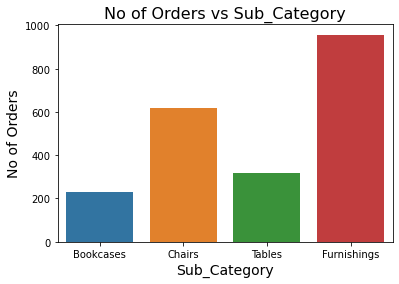

In [79]:
#Barplot
sns.countplot(x='Sub_Category', data=ss)
plt.xlabel('Sub_Category', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Sub_Category', fontsize=16)
plt.show()

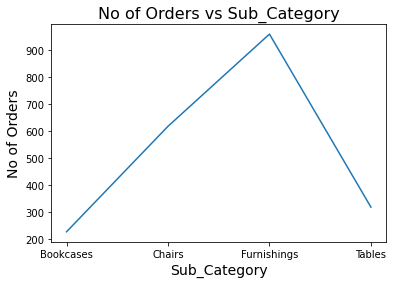

In [80]:
#Lineplot
plt.plot(ss.groupby('Sub_Category')['Order_ID'].count())
plt.xlabel('Sub_Category', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Sub_Category', fontsize=16)
plt.show()

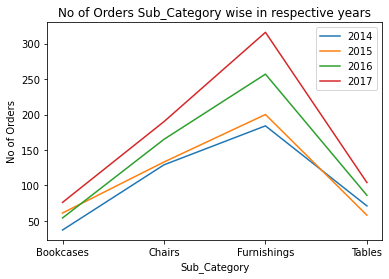

In [81]:
#Plot No of Orders Sub_Category wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Sub_Category')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2015].groupby('Sub_Category')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2016].groupby('Sub_Category')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2017].groupby('Sub_Category')['Order_ID'].count())
plt.xlabel('Sub_Category')
plt.ylabel('No of Orders')
plt.title('No of Orders Sub_Category wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

In [82]:
#Variable 16 - Product Name
#Adjusting the variable name
ss = ss.rename(columns={"Product Name":"Product_Name"})
ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2121 entries, 2016-11-08 to 2017-02-26
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order_ID       2121 non-null   object        
 2   Ship_Date      2121 non-null   datetime64[ns]
 3   Ship_Mode      2121 non-null   object        
 4   Customer_ID    2121 non-null   object        
 5   Customer_Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal_Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product_ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub_Category   2121 non-null   object        
 15  Pro

In [83]:
ss.Product_Name.describe()

count                           2121
unique                           380
top       KI Adjustable-Height Table
freq                              18
Name: Product_Name, dtype: object

In [84]:
ss.Product_Name.value_counts() #380 Different product names

KI Adjustable-Height Table                                           18
Staple-based wall hangings                                           16
Situations Contoured Folding Chairs, 4/Set                           15
Eldon Wave Desk Accessories                                          14
Global Wood Trimmed Manager's Task Chair, Khaki                      14
                                                                     ..
Linden 12" Wall Clock With Oak Frame                                  1
Ultra Commercial Grade Dual Valve Door Closer                         1
Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops     1
Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs          1
Bush Birmingham Collection Bookcase, Dark Cherry                      1
Name: Product_Name, Length: 380, dtype: int64

In [85]:
ss.Product_Name.value_counts().sum() #2121

2121

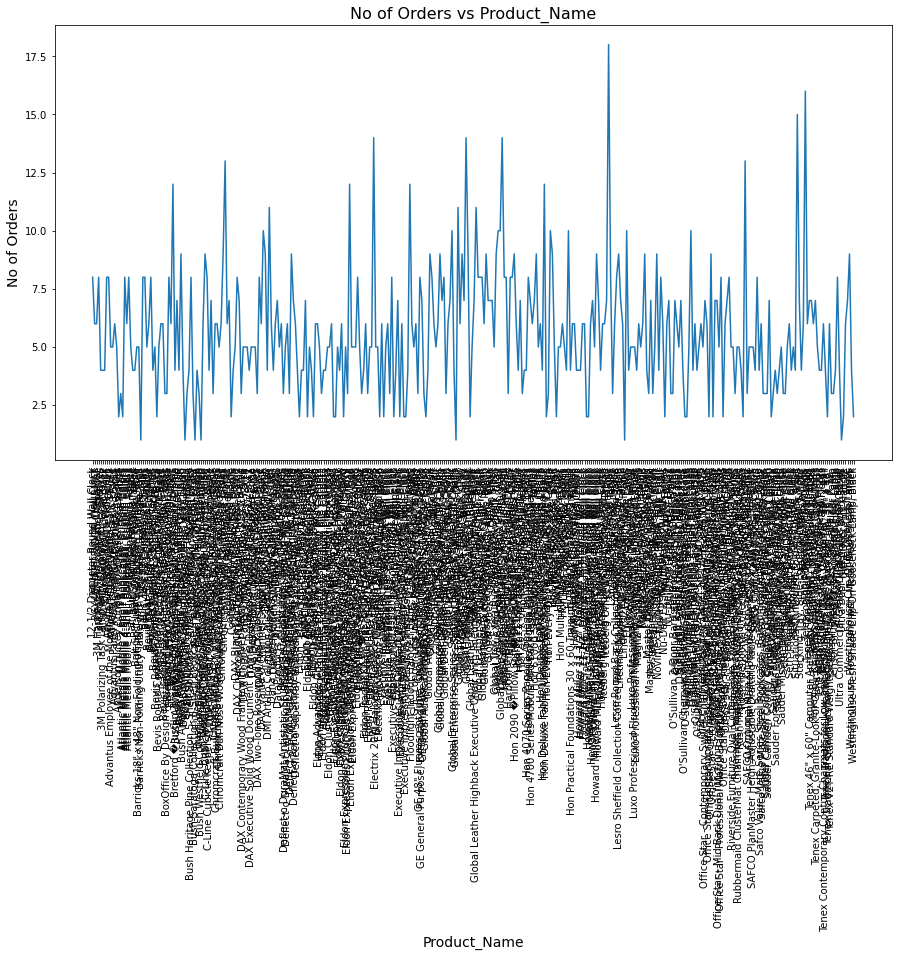

In [86]:
#Lineplot
fig = plt.gcf() 
fig.set_size_inches(15,8)
plt.plot(ss.groupby('Product_Name')['Order_ID'].count())
plt.xlabel('Product_Name', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Product_Name', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [87]:
#Variable 17 - Sales
ss.Sales.describe()

count    2121.000000
mean      349.834887
std       503.179145
min         1.892000
25%        47.040000
50%       182.220000
75%       435.168000
max      4416.174000
Name: Sales, dtype: float64

In [88]:
ss.Sales.value_counts() #1636 different Sales value


14.760     6
301.960    6
6.160      6
18.840     6
141.960    6
          ..
53.200     1
45.840     1
340.704    1
34.580     1
77.920     1
Name: Sales, Length: 1636, dtype: int64

In [89]:
ss.Sales.value_counts().sum() #2121

2121

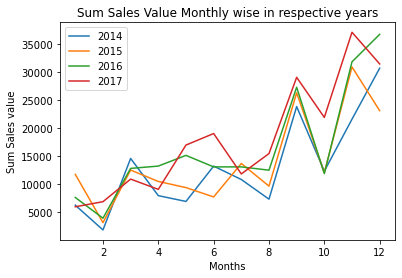

In [90]:
#Plot Sales Value Monthly wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Order_month')['Sales'].sum())
plt.plot(ss[ss.Order_year==2015].groupby('Order_month')['Sales'].sum())
plt.plot(ss[ss.Order_year==2016].groupby('Order_month')['Sales'].sum())
plt.plot(ss[ss.Order_year==2017].groupby('Order_month')['Sales'].sum())
plt.xlabel('Months')
plt.ylabel('Sum Sales value')
plt.title('Sum Sales Value Monthly wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

In [91]:
#Variable 18 - Quantity
ss.Quantity.describe()

count    2121.000000
mean        3.785007
std         2.251620
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

In [92]:
ss.Quantity.value_counts() #14 different quantities

3     534
2     503
5     253
4     247
1     193
6     121
7     115
8      58
9      58
10     12
14      8
11      8
12      6
13      5
Name: Quantity, dtype: int64

In [93]:
ss.Quantity.value_counts().sum() #2121

2121

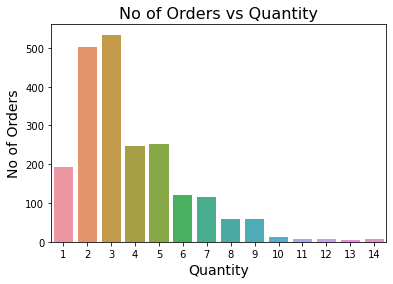

In [94]:
#Barplot
sns.countplot(x='Quantity', data=ss)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Quantity', fontsize=16)
plt.show()


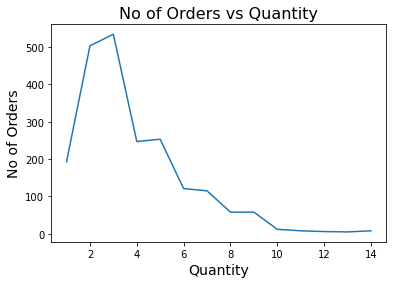

In [95]:
#Lineplot
plt.plot(ss.groupby('Quantity')['Order_ID'].count())
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Quantity', fontsize=16)
plt.show()

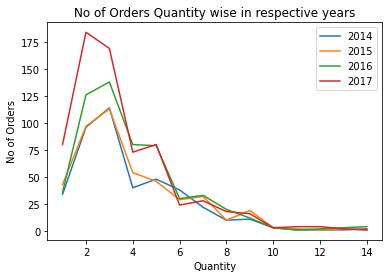

In [96]:
#Plot No of Orders Quantity wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Quantity')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2015].groupby('Quantity')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2016].groupby('Quantity')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2017].groupby('Quantity')['Order_ID'].count())
plt.xlabel('Quantity')
plt.ylabel('No of Orders')
plt.title('No of Orders Quantity wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

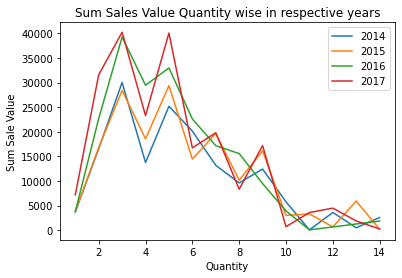

In [97]:
#Plot Sales value Quantity wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Quantity')['Sales'].sum())
plt.plot(ss[ss.Order_year==2015].groupby('Quantity')['Sales'].sum())
plt.plot(ss[ss.Order_year==2016].groupby('Quantity')['Sales'].sum())
plt.plot(ss[ss.Order_year==2017].groupby('Quantity')['Sales'].sum())
plt.xlabel('Quantity')
plt.ylabel('Sum Sale Value')
plt.title('Sum Sales Value Quantity wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

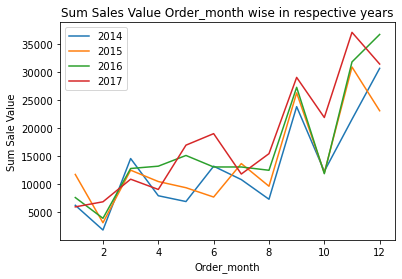

In [98]:
#Plot Sales value Order_month wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Order_month')['Sales'].sum())
plt.plot(ss[ss.Order_year==2015].groupby('Order_month')['Sales'].sum())
plt.plot(ss[ss.Order_year==2016].groupby('Order_month')['Sales'].sum())
plt.plot(ss[ss.Order_year==2017].groupby('Order_month')['Sales'].sum())
plt.xlabel('Order_month')
plt.ylabel('Sum Sale Value')
plt.title('Sum Sales Value Order_month wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

In [99]:
#Variable 19 - Discount
ss.Discount.describe()

count    2121.000000
mean        0.173923
std         0.181547
min         0.000000
25%         0.000000
50%         0.200000
75%         0.300000
max         0.700000
Name: Discount, dtype: float64

In [100]:
ss.Discount.value_counts() #11 different discounts


0.00    836
0.20    615
0.30    222
0.60    138
0.10     76
0.40     75
0.50     54
0.15     52
0.32     27
0.70     15
0.45     11
Name: Discount, dtype: int64

In [101]:
ss.Discount.value_counts().sum() #2121


2121

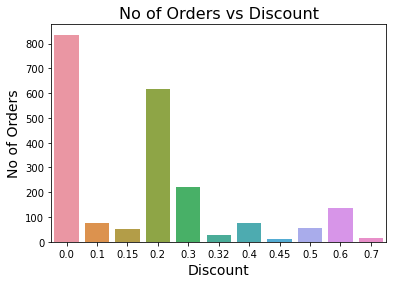

In [102]:
#Barplot
sns.countplot(x='Discount', data=ss)
plt.xlabel('Discount', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Discount', fontsize=16)
plt.show()

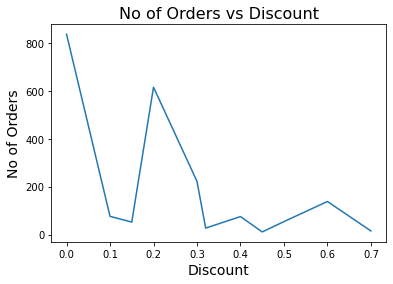

In [103]:
#Lineplot
plt.plot(ss.groupby('Discount')['Order_ID'].count())
plt.xlabel('Discount', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Discount', fontsize=16)
plt.show()


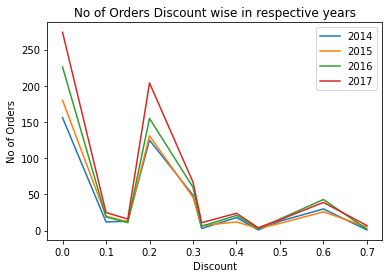

In [104]:
#Plot No of Orders Discount wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Discount')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2015].groupby('Discount')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2016].groupby('Discount')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2017].groupby('Discount')['Order_ID'].count())
plt.xlabel('Discount')
plt.ylabel('No of Orders')
plt.title('No of Orders Discount wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()


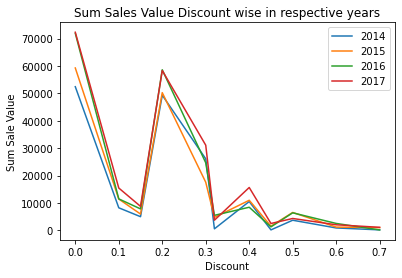

In [105]:
#Plot Sales value Discount wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Discount')['Sales'].sum())
plt.plot(ss[ss.Order_year==2015].groupby('Discount')['Sales'].sum())
plt.plot(ss[ss.Order_year==2016].groupby('Discount')['Sales'].sum())
plt.plot(ss[ss.Order_year==2017].groupby('Discount')['Sales'].sum())
plt.xlabel('Discount')
plt.ylabel('Sum Sale Value')
plt.title('Sum Sales Value Discount wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

In [106]:
#Variable 20 - Profit
ss.Profit.describe()

count    2121.000000
mean        8.699327
std       136.049246
min     -1862.312400
25%       -12.849000
50%         7.774800
75%        33.726600
max      1013.127000
Name: Profit, dtype: float64

In [107]:
ss[ss.Profit>=0].Profit.value_counts().sum() #1407 Positive values ie profit
ss[ss.Profit<0].Profit.value_counts().sum() #714 negative values ie loss


714

In [108]:
ss.Profit.value_counts().sum() #2121

2121

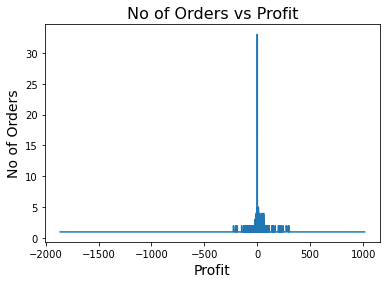

In [109]:
#Lineplot
plt.plot(ss.groupby('Profit')['Order_ID'].count())
plt.xlabel('Profit', fontsize=14)
plt.ylabel('No of Orders', fontsize=14)
plt.title('No of Orders vs Profit', fontsize=16)
plt.show()

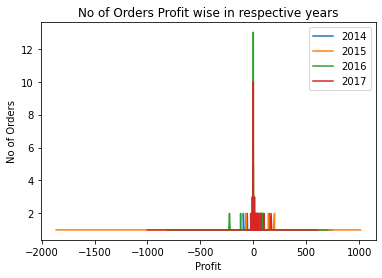

In [110]:
#Plot No of Orders Profit wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Profit')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2015].groupby('Profit')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2016].groupby('Profit')['Order_ID'].count())
plt.plot(ss[ss.Order_year==2017].groupby('Profit')['Order_ID'].count())
plt.xlabel('Profit')
plt.ylabel('No of Orders')
plt.title('No of Orders Profit wise in respective years')
plt.legend([2014,2015,2016,2017])
plt.show()

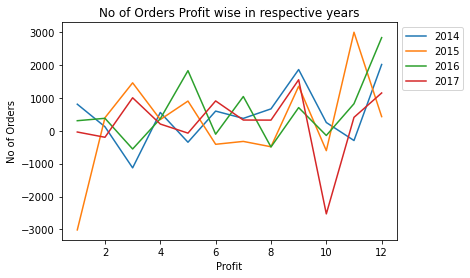

In [111]:
#Plot No of Orders Profit wise in respective years
plt.plot(ss[ss.Order_year==2014].groupby('Order_month')['Profit'].sum())
plt.plot(ss[ss.Order_year==2015].groupby('Order_month')['Profit'].sum())
plt.plot(ss[ss.Order_year==2016].groupby('Order_month')['Profit'].sum())
plt.plot(ss[ss.Order_year==2017].groupby('Order_month')['Profit'].sum())
plt.xlabel('Profit')
plt.ylabel('No of Orders')
plt.title('No of Orders Profit wise in respective years')
plt.legend([2014,2015,2016,2017],bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [112]:
#Building model on Sales
#Getting monthly wise sum data
ss_sales =  pd.DataFrame(ss.Sales.resample('M').sum())
ss_sales.shape #48 observations

(48, 1)

NameError: name 'Plt' is not defined

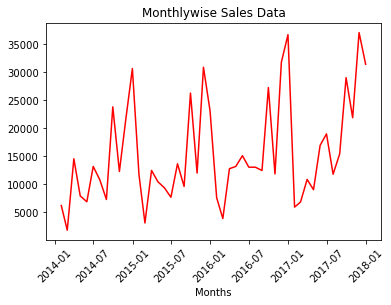

In [113]:
#Plot
plt.plot(ss_sales, 'r')
plt.xticks(rotation=45)
plt.title('Monthlywise Sales Data')
plt.xlabel('Months')
Plt.ylabel('Sales Value')
plt.show()


Order_Date
2014-01-31         NaN
2014-02-28         NaN
2014-03-31         NaN
2014-04-30         NaN
2014-05-31         NaN
2014-06-30         NaN
2014-07-31    0.946340
2014-08-31    0.814023
2014-09-30    0.998076
2014-10-31    1.093775
2014-11-30    0.829452
2014-12-31    1.121211
2015-01-31    1.506037
2015-02-28    0.764480
2015-03-31    1.134313
2015-04-30    1.054442
2015-05-31    0.760320
2015-06-30    0.666622
2015-07-31    1.135409
2015-08-31    1.049585
2015-09-30    1.072105
2015-10-31    1.033100
2015-11-30    1.136793
2015-12-31    0.776087
2016-01-31    0.879614
2016-02-29    0.869544
2016-03-31    1.059081
2016-04-30    1.217554
2016-05-31    1.150372
2016-06-30    1.024800
2016-07-31    0.922874
2016-08-31    1.141016
2016-09-30    0.934442
2016-10-31    0.877748
2016-11-30    1.038379
2016-12-31    1.107325
2017-01-31    0.618972
2017-02-28    1.370599
2017-03-31    0.811229
2017-04-30    0.732626
2017-05-31    1.093932
2017-06-30    1.313201
2017-07-31         NaN


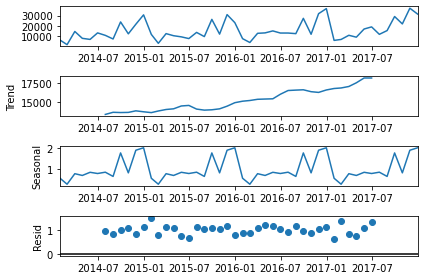

In [114]:
#Decompose with multiplicative model
from statsmodels.tsa.seasonal import seasonal_decompose
ss_sales_dec_m = seasonal_decompose(ss_sales, model='mul')
ss_sales_dec_m.plot() #Trend & seasonality can be observed
ss_sales_dec_m.observed 
ss_sales_dec_m.trend
ss_sales_dec_m.seasonal
ss_sales_dec_m.resid


Order_Date
2014-01-31            NaN
2014-02-28            NaN
2014-03-31            NaN
2014-04-30            NaN
2014-05-31            NaN
2014-06-30            NaN
2014-07-31    -470.626799
2014-08-31   -1481.116791
2014-09-30    -903.879569
2014-10-31    1245.623259
2014-11-30   -5555.340745
2014-12-31    1811.705566
2015-01-31    4804.583212
2015-02-28     -89.740566
2015-03-31    1839.217203
2015-04-30    1076.640302
2015-05-31   -2952.019862
2015-06-30   -3907.207347
2015-07-31    1672.902509
2015-08-31     548.878976
2015-09-30    1186.415073
2015-10-31     494.210034
2015-11-30    3141.485538
2015-12-31   -6956.369442
2016-01-31    -828.420997
2016-02-29    -692.166024
2016-03-31     786.102491
2016-04-30    2514.570894
2016-05-31    1839.803167
2016-06-30     -34.704134
2016-07-31   -1400.702058
2016-08-31     733.811467
2016-09-30    -480.961852
2016-10-31   -1938.259641
2016-11-30    2215.428859
2016-12-31    4946.237528
2017-01-31   -4174.588563
2017-02-28     583.480242
2

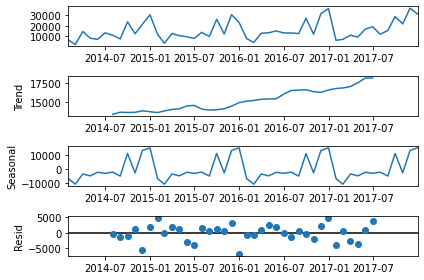

In [115]:
#Decompose with additive model
from statsmodels.tsa.seasonal import seasonal_decompose
ss_sales_dec_a = seasonal_decompose(ss_sales, model='add')
ss_sales_dec_a.plot() #Trend & seasonality can be observed
ss_sales_dec_a.observed
ss_sales_dec_a.trend
ss_sales_dec_a.seasonal
ss_sales_dec_a.resid

In [116]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
ss_sales_adf = adfuller(ss_sales)


In [117]:
print('ADF Statistic: %f' % ss_sales_adf[0])
print('p-value: %f' % ss_sales_adf[1])
print('Critical Values:')
for key, value in ss_sales_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.699026
p-value: 0.000085
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


In [ ]:
#p-value: 0.000085 ie < 0.05, Null Hypothesis is rejected, so, Data is stationary
#H0 data is not stationary

In [118]:
#Applying auto arima method for prediction
from pmdarima import auto_arima


In [119]:
ss_sales_aa = auto_arima(ss_sales)
ss_sales_aa.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -502.820
Date:                Mon, 06 Sep 2021   AIC                           1011.640
Time:                        08:00:18   BIC                           1017.253
Sample:                             0   HQIC                          1013.761
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.084e+04   2695.066      4.021      0.000    5554.237    1.61e+04
ar.L1          0.3056      0.131      2.328      0.020       0.048       0.563
sigma2      7.318e+07      0.160   4.56e+08      0.000    7.32e+07    7.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.70
Prob(Q):                              0.98   Prob(JB):                         0.16
Heteroskedasticity (H):               1.88   Skew:                             0.64
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.52e+24. Standard errors may be unstable.
"""

In [120]:
#Residuals/Errors
ss_sales_res = pd.DataFrame(ss_sales_aa.resid(), index=ss_sales.index)
ss_sales_res 


,0
Order_Date,
2014-01-31,-9362.012667
2014-02-28,-10904.255767
2014-03-31,3175.366899
2014-04-30,-7344.799731
2014-05-31,-6351.279278
2014-06-30,257.408917
2014-07-31,-4050.636251
2014-08-31,-6822.565684
2014-09-30,10743.231659


In [121]:
#Model values - Fitted values
ss_sales_aa_v = pd.DataFrame(ss_sales_aa.predict_in_sample(),index=ss_sales.index)
ss_sales_aa_v


,0
Order_Date,
2014-01-31,15604.537667
2014-02-28,12743.913767
2014-03-31,11398.589101
2014-04-30,15289.636731
2014-05-31,13264.066278
2014-06-30,12948.716683
2014-07-31,14871.687251
2014-08-31,14142.912184
2014-09-30,13073.249141


Text(0.5, 1.0, 'Line plot of Residuals')

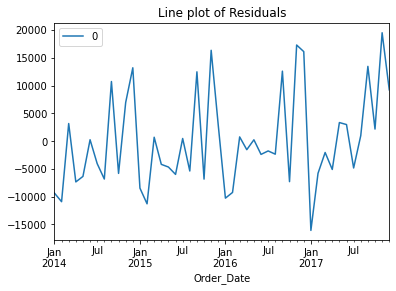

In [122]:
#Lineplot
ss_sales_res.plot()
plt.title('Line plot of Residuals')


In [ ]:
#Histogram of residuals
plt.hist(ss_sales_res)
plt.title('Histogram of Residuals')

Text(0.5, 1.0, 'Density plot of Residuals')

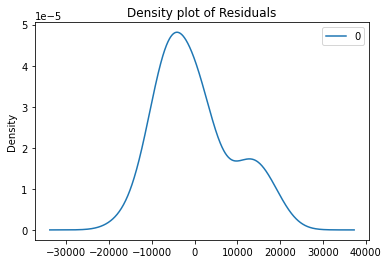

In [123]:
#Density plot
ss_sales_res.plot(kind='kde')
plt.title('Density plot of Residuals')


C:\Program Files\ancondapython\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


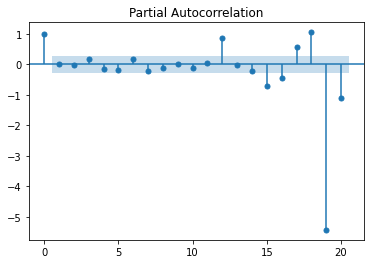

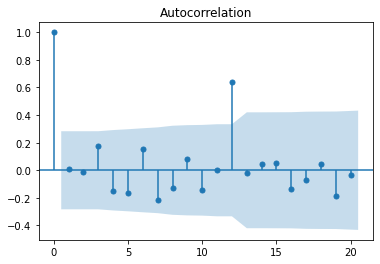

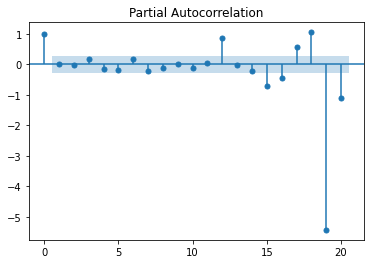

In [124]:
#Plotting acf & pacf for residuals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(ss_sales_res, lags=20) 
plot_pacf(ss_sales_res, lags=20)


In [125]:
#Squaring residuals/ errors
ss_sales_se = pow(ss_sales_res,2)
ss_sales_se.head()

,0
Order_Date,
2014-01-31,8.764728e+07
2014-02-28,1.189028e+08
2014-03-31,1.008295e+07
2014-04-30,5.394608e+07
2014-05-31,4.033875e+07


In [126]:
#average/mean of squared residuals/ errors
ss_sales_mse = (ss_sales_se.sum())/len(ss_sales_se)
print(ss_sales_mse) #7.353159e+07

0    7.353159e+07
dtype: float64


In [127]:
#Root of average/mean of squared residuals/ errors
ss_sales_rmse = sqrt(ss_sales_mse) 
ss_sales_rmse #8575.056439986281

8575.056439985643

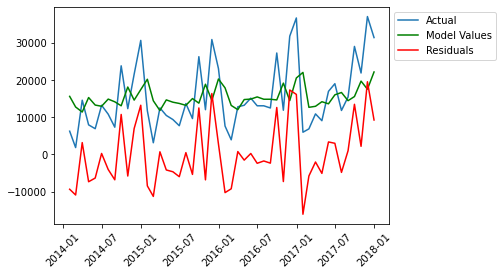

In [128]:
#Plot comparision Actual, Model Values & Residuals
plt.plot(ss_sales)
plt.plot(ss_sales_aa_v, 'g')
plt.plot(ss_sales_res, 'r')
plt.legend(['Actual','Model Values', 'Residuals'],
           bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=45)
plt.show()

In [131]:
#Predict
ss_sales_pred = ss_sales_aa.predict(n_periods=12) 
ss_sales_pred = pd.DataFrame(ss_sales_pred, 
                             index=pd.date_range(start='2018-01-31', 
                                                 end='2018-12-31', freq='M'))


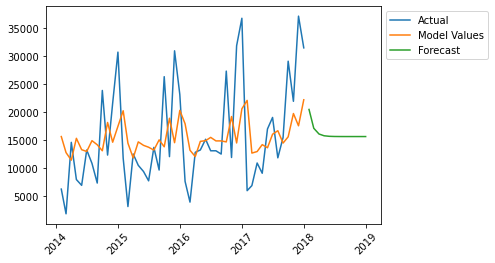

In [130]:
#Plot comparision Actual, Model Values & Forecast
plt.plot(ss_sales)
plt.plot(ss_sales_aa_v)
plt.plot(ss_sales_pred)
plt.legend(['Actual','Model Values', 'Forecast'],
           bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=45)
plt.show()

In [132]:
#Model with triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ss_sales_es = ExponentialSmoothing(ss_sales, seasonal_periods=12,
                                 trend='add', seasonal='add').fit()
ss_sales_es.summary()

C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Program Files\ancondapython\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Sales,No. Observations:,48
Model:,ExponentialSmoothing,SSE,587001664.255
Optimized:,True,AIC,815.328
Trend:,Additive,BIC,845.267
Seasonal:,Additive,AICC,838.914
Seasonal Periods:,12,Date:,"Mon, 06 Sep 2021"
Box-Cox:,False,Time:,08:01:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0001,beta,True


In [133]:
#Residuals
ss_sales_res1 = pd.DataFrame(ss_sales_es.resid)
ss_sales_res1

,0
Order_Date,
2014-01-31,-92.537388
2014-02-28,-184.612043
2014-03-31,-276.226233
2014-04-30,-367.382213
2014-05-31,-458.082230
2014-06-30,-548.328517
2014-07-31,-638.123299
2014-08-31,-727.468788
2014-09-30,-816.367186


Text(0.5, 1.0, 'Line plot of Residuals')

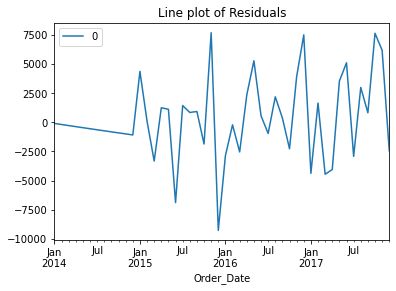

In [134]:
#Lineplot
ss_sales_res1.plot()
plt.title('Line plot of Residuals')


Text(0.5, 1.0, 'Histogram of Residuals')

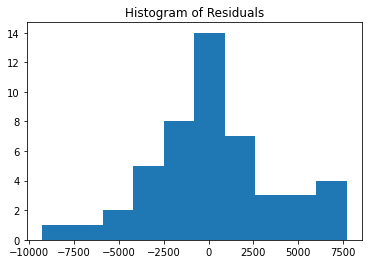

In [135]:
#Histogram of residuals
plt.hist(ss_sales_res1)
plt.title('Histogram of Residuals')


Text(0.5, 1.0, 'Density plot of Residuals')

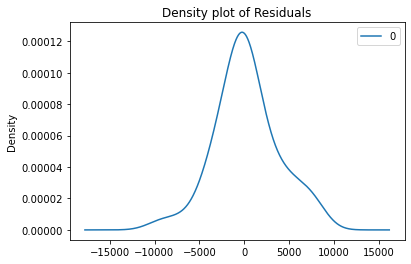

In [136]:
#Density plot
ss_sales_res1.plot(kind='kde')
plt.title('Density plot of Residuals')

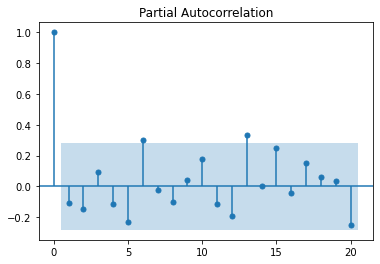

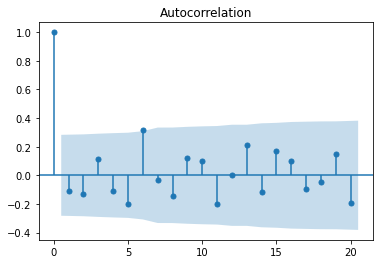

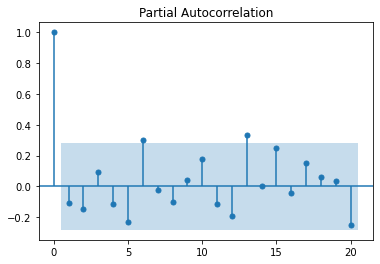

In [137]:
#Plotting acf & pacf for residuals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(ss_sales_res1, lags=20) 
plot_pacf(ss_sales_res1, lags=20)


In [138]:
#Squaring residuals/ errors
ss_sales_se1 = pow(ss_sales_res1,2)
ss_sales_se1.head()


,0
Order_Date,
2014-01-31,8563.168214
2014-02-28,34081.606487
2014-03-31,76300.931567
2014-04-30,134969.690375
2014-05-31,209839.329146


In [139]:
#average/mean of squared residuals/ errors
ss_sales_mse1 = (ss_sales_se1.sum())/len(ss_sales_se1)
print(ss_sales_mse1) #1.222920e+07

0    1.222920e+07
dtype: float64


In [140]:
#Root of average/mean of squared residuals/ errors
ss_sales_rmse1 = sqrt(ss_sales_mse1) 
ss_sales_rmse1 #3497.0275004124182

3497.0275004124173

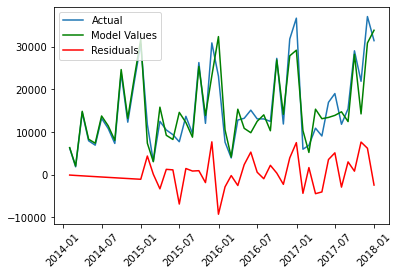

In [141]:
#Plot Actual, Model Values and Residuals
plt.plot(ss_sales)
plt.plot(ss_sales_es.fittedvalues, 'g')
plt.plot(ss_sales_res1, 'r')
plt.legend(['Actual','Model Values', 'Residuals'])
plt.xticks(rotation=45)
plt.show()

In [142]:
#Predict/forecast
ss_sales_fore = ss_sales_es.forecast(12) 
ss_sales_fore


2018-01-31     9476.047206
2018-02-28     7155.873326
2018-03-31    14462.330757
2018-04-30    12440.601392
2018-05-31    16265.966076
2018-06-30    17454.642182
2018-07-31    14555.673004
2018-08-31    15016.598288
2018-09-30    29758.178183
2018-10-31    18939.372736
2018-11-30    34855.789465
2018-12-31    34945.584656
Freq: M, dtype: float64

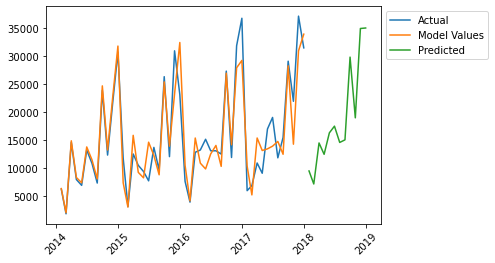

In [143]:
#Plot Actual, Model Values & forecast
plt.plot(ss_sales)
plt.plot(ss_sales_es.fittedvalues)
plt.plot(ss_sales_fore)
plt.legend(['Actual','Model Values', 'Predicted'],
           bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=45)
plt.show()

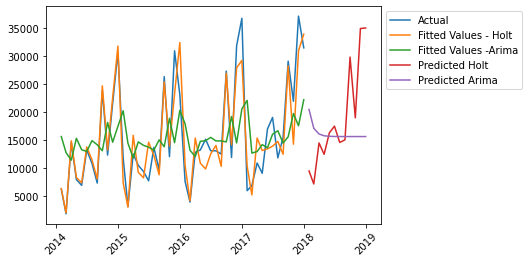

In [144]:
#Plot Actual, Model/Fitted Values & forecast Arima & Holt winter
plt.plot(ss_sales)
plt.plot(ss_sales_es.fittedvalues)
plt.plot(ss_sales_aa_v)
plt.plot(ss_sales_fore)
plt.plot(ss_sales_pred)
plt.legend(['Actual','Fitted Values - Holt', 'Fitted Values -Arima', 
            'Predicted Holt', 'Predicted Arima'], bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=45)
plt.show()